<a href="https://colab.research.google.com/github/YejinR/Linear-algebra2/blob/main/202210916_%EB%A5%98%EC%98%88%EC%A7%84_TIE_Fighter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

INF = 1500  # 그림판 크기
LEN = 100   # 처음 사각형의 크기

In [ ]:
def draw_axis(ax): # 좌표축을 그리는 함수
  ax.axhline(0, color='black', alpha=0.3) 
  ax.axvline(0, color='black', alpha=0.3)  
  ax.set_xlim(-INF, INF) # 축 제한
  ax.set_ylim(-INF, INF) 
  ax.set_aspect('equal') 

In [ ]:
def draw_rectangle(ax, p1, p2, p3, p4): 
  my_polygon = Polygon([p1, p2, p3, p4])
  ax.add_patch(my_polygon)

In [ ]:
def draw_object(ax): 
  p1 = np.array([0, 0])
  p2 = np.array([LEN, 0])
  p3 = np.array([LEN, LEN])
  p4 = np.array([0, LEN])

  draw_rectangle(ax, p1, p2, p3, p4)

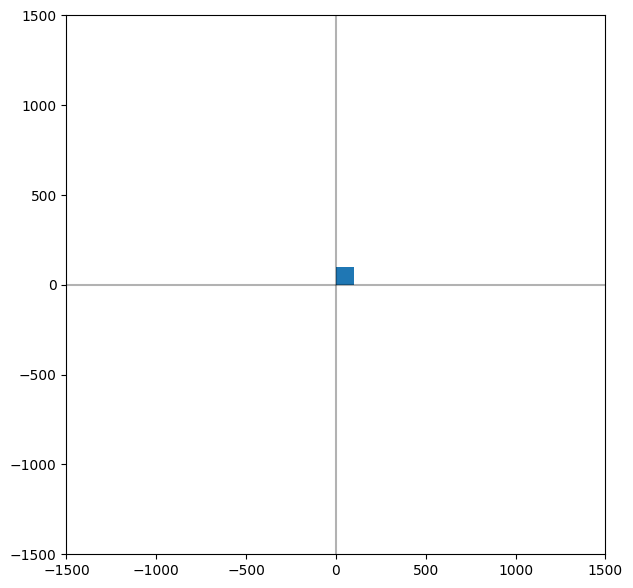

In [ ]:
fig, ax = plt.subplots(figsize=(7,7)) 

draw_axis(ax)

draw_object(ax) 

plt.show()

1. 변환 구현
translate(p, dx, dy)

*  rotate(p, theta)
*   scale(p, sx, sy)
*   shear_x(p, sx)
*   shear_y(p, sy)
*   reflect_x(p)
*   reflect_y(p)



In [ ]:
def translate(p, dx, dy):
  hp = np.array([p[0], p[1], 1.0])

  m = np.array([[1.0, 0.0, dx], [0.0, 1.0, dy], [0.0, 0.0, 1.0]])  
  q = np.dot(m, hp) 

  q = np.array([q[0], q[1]])
  return q

In [ ]:
def rotate(p, theta):
  cos = np.cos(theta)
  sin = np.sin(theta)

  hp = np.array([p[0], p[1], 1.0])

  m = np.array([[cos, -sin, 0.0 ], [sin, cos, 0.0], [0.0, 0.0, 1.0]])  

  q = np.dot(m, hp)  # (3,3) x (3,1) -> (3,1)

  q = np.array([q[0], q[1]])
  return q

In [ ]:
def scale(p, sx, sy):
  hp = np.array([p[0], p[1], 1.0])

  m = np.array([[sx, 0.0, 0.0 ], [0.0, sy, 0.0], [0.0, 0.0, 1.0]])  

  q = np.dot(m, hp)  # (3,3) x (3,1) -> (3,1)

  q = np.array([q[0], q[1]])
  return q

In [ ]:
def shear_x(p, sx): #
  hp = np.array([p[0], p[1], 1.0])

  m = np.array([[1.0, sx, 0.0 ], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])  

  q = np.dot(m, hp)  # (3,3) x (3,1) -> (3,1)
  #print(q)

  q = np.array([q[0], q[1]])
  return q

In [ ]:
def shear_y(p, sy):
  hp = np.array([p[0], p[1], 1.0])

  m = np.array([[1.0 , 0.0, 0.0 ], [sy, 1.0, 0.0], [0.0, 0.0, 1.0]]) 

  q = np.dot(m, hp)  # (3,3) x (3,1) -> (3,1)
  #print(q)

  q = np.array([q[0], q[1]])
  return q

In [ ]:
def reflect_x(p):
  hp = np.array([p[0], p[1], 1.0])

  m = np.array([[1.0, 0.0, 0.0 ], [0.0, -1.0, 0.0], [0.0, 0.0, 1.0]])  

  q = np.dot(m, hp)  # (3,3) x (3,1) -> (3,1)
  #print(q)

  q = np.array([q[0], q[1]])
  return q

In [ ]:
def reflect_y(p):
  hp = np.array([p[0], p[1], 1.0])

  m = np.array([[-1.0, 0.0, 0.0 ], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])  

  q = np.dot(m, hp)  # (3,3) x (3,1) -> (3,1)
  #print(q)

  q = np.array([q[0], q[1]])
  return q

In [ ]:
def draw_cockpit(ax, p1, p2, p3, p4): 

  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  s = 6
  q1 = scale(q1, s, s)
  q2 = scale(q2, s, s)
  q3 = scale(q3, s, s)
  q4 = scale(q4, s, s)

  q1 = rotate(q1, 3.14/4.0)
  q2 = rotate(q2, 3.14/4.0)
  q3 = rotate(q3, 3.14/4.0)
  q4 = rotate(q4, 3.14/4.0)

  draw_rectangle(ax, q1, q2, q3, q4)

In [ ]:
def draw_left_arm(ax, p1, p2, p3, p4):

  q1 = translate(p1, LEN*2+70, -LEN/2+80)
  q2 = translate(p2, LEN*2+70, -LEN*3/2+80)
  q3 = translate(p3, LEN*2+70, LEN/2+80)
  q4 = translate(p4, LEN*2+70, -LEN/2+80)

  s = 1
  q1 = scale(q1, s, s+2)
  q2 = scale(q2, s, s+2)
  q3 = scale(q3, s, s+2)
  q4 = scale(q4, s, s+2)
  
  q1 = rotate(q1, -3.14/2.85)
  q2 = rotate(q2, -3.14/2.85)
  q3 = rotate(q3, -3.14/2.85)
  q4 = rotate(q4, -3.14/2.85)
  
  draw_rectangle(ax, q1, q2, q3, q4)

  q1 = reflect_x(q1)
  q2 = reflect_x(q2)
  q3 = reflect_x(q3)
  q4 = reflect_x(q4)

  draw_rectangle(ax, q1, q2, q3, q4)
  

In [ ]:
def draw_right_arm(ax, p1, p2, p3, p4):

  q1 = translate(p1, LEN*2+70, -LEN/2+80)
  q2 = translate(p2, LEN*2+70, -LEN*3/2+80)
  q3 = translate(p3, LEN*2+70, LEN/2+80)
  q4 = translate(p4, LEN*2+70, -LEN/2+80)

  s = 1
  q1 = scale(q1, s, s+2)
  q2 = scale(q2, s, s+2)
  q3 = scale(q3, s, s+2)
  q4 = scale(q4, s, s+2)
  
  q1 = rotate(q1, -3.14/2.85)
  q2 = rotate(q2, -3.14/2.85)
  q3 = rotate(q3, -3.14/2.85)
  q4 = rotate(q4, -3.14/2.85)

  q1 = reflect_y(q1)
  q2 = reflect_y(q2)
  q3 = reflect_y(q3)
  q4 = reflect_y(q4)

  draw_rectangle(ax, q1, q2, q3, q4)

  q1 = reflect_x(q1)
  q2 = reflect_x(q2)
  q3 = reflect_x(q3)
  q4 = reflect_x(q4)

  draw_rectangle(ax, q1, q2, q3, q4)

In [ ]:
def draw_wing(ax, p1, p2, p3, p4):

  q1 = translate(p1, LEN*4.5+250, -LEN/2)
  q2 = translate(p2, LEN*4.5+250, -LEN*3/2)
  q3 = translate(p3, LEN*4.5+250, LEN/2)
  q4 = translate(p4, LEN*4.5+250, -LEN/2)

  s = 5
  q1 = scale(q1, s-4, s)
  q2 = scale(q2, s-4, s)
  q3 = scale(q3, s-4, s)
  q4 = scale(q4, s-4, s)
  
  q1 = rotate(q1, 0.0)
  q2 = rotate(q2, 0.0)
  q3 = rotate(q3, 0.0)
  q4 = rotate(q4, 0.0)
  
  draw_rectangle(ax, q1, q2, q3, q4)

  q1 = reflect_y(q1)
  q2 = reflect_y(q2)
  q3 = reflect_y(q3)
  q4 = reflect_y(q4)

  draw_rectangle(ax, q1, q2, q3, q4)

In [ ]:
def draw_object(ax):
  p1 = np.array([0, 0])
  p2 = np.array([LEN, 0])
  p3 = np.array([LEN, LEN])
  p4 = np.array([0, LEN])

  draw_cockpit(ax, p1, p2, p3, p4)
  draw_wing(ax, p1, p2, p3, p4)
  draw_left_arm(ax, p1, p2, p3, p4)
  draw_right_arm(ax, p1, p2, p3, p4)

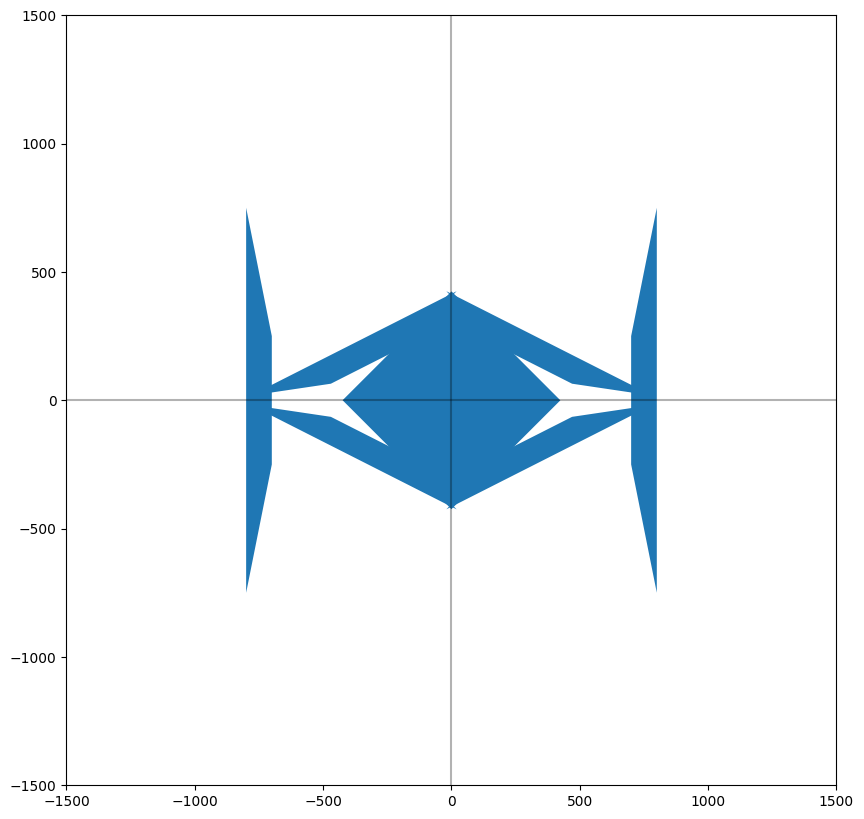

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 

draw_axis(ax) 

draw_object(ax) 

plt.show()